In [1]:
a360ai

<A360 AI Interface for project: Jupyter R-Python>

In [2]:
!pip install inflection

  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inflection
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 1. Set Default Data Repo and load data

In [5]:
a360ai.list_datarepos()

,name,description,storage_provider
0,Jupyter R-Python,Test Jupyter R-Python notebook image,aws


In [6]:
a360ai.set_default_datarepo("Jupyter R-Python")

In [7]:
a360ai.list_datasets()

,base_name,extension,size
1,SMSSpamCollection,,483481.0
2,SMSSpamCollection.csv,csv,500350.0


In [19]:
df = a360ai.load_dataset("SMSSpamCollection.csv")

### 2. Data overview

In [20]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### Check Null value

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Check data shape

In [11]:
df.shape

(5572, 2)

In [12]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Check duplicated values

In [13]:
df.duplicated().sum()

403

#### Check data type

In [14]:
# categorical
column_categorical = list(df.columns)

data_type_general = dict()

for col in df.columns:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,label,message
general data types,categorical,categorical


In [15]:
data_type = pd.DataFrame(df.dtypes).T.rename({0:'python data types'})
data_type

,label,message
python data types,object,object


#### Check numerical data

#### Check categorical data

### 3. Exploratory data analysis (EDA)

In [16]:
# numerical
column_numerical = ['label', 'message']

# categorical
column_categorical = list(df.columns)


In [17]:
data_viz = df.copy()
data_viz.loc[:,'label'] = data_viz.loc[:, 'label'].apply(lambda x: 'label' if x == 'ham' else 'spam')

#### Check target distribution (spam %)

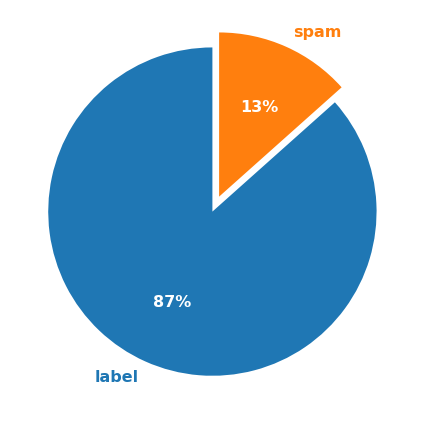

In [18]:
pie_data = data_viz['label'].value_counts(normalize=True).values * 100
pie_label = data_viz['label'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()